# Merge subclustering results of integration data

In [1]:
#load packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.0.5      dplyr_1.0.3       Matrix_1.3-2      data.table_1.13.6
[5] magrittr_2.0.1    ggplot2_3.3.3     Seurat_3.2.3     

loaded via a namespace (and not attached):
  [1] nlme_3.1-151          matrixStats_0.57.0    RcppAnnoy_0.0.18     
  [4] RColorBrewer_1.1-2    httr_1.4.2            repr_1.1.0           
  [7] sctransform_0.3.2     tools_4.0.3           R6_2.5.1             
 [10] irlba_2.3.3           rpart_4.1-15          KernSmooth_2.23-18   
 [13] uwot_0.1.10           mgcv

In [3]:
#loading data before subclustering
seu_HQC <- readRDS(file = '../../data/seurat_object/all_integration/seu_Harmony_integrated.obj')
seu_HQC

An object of class Seurat 
25136 features across 13467 samples within 2 assays 
Active assay: SCT (12568 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, harmony

In [4]:
seu_HQC

An object of class Seurat 
25136 features across 13467 samples within 2 assays 
Active assay: SCT (12568 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, harmony

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


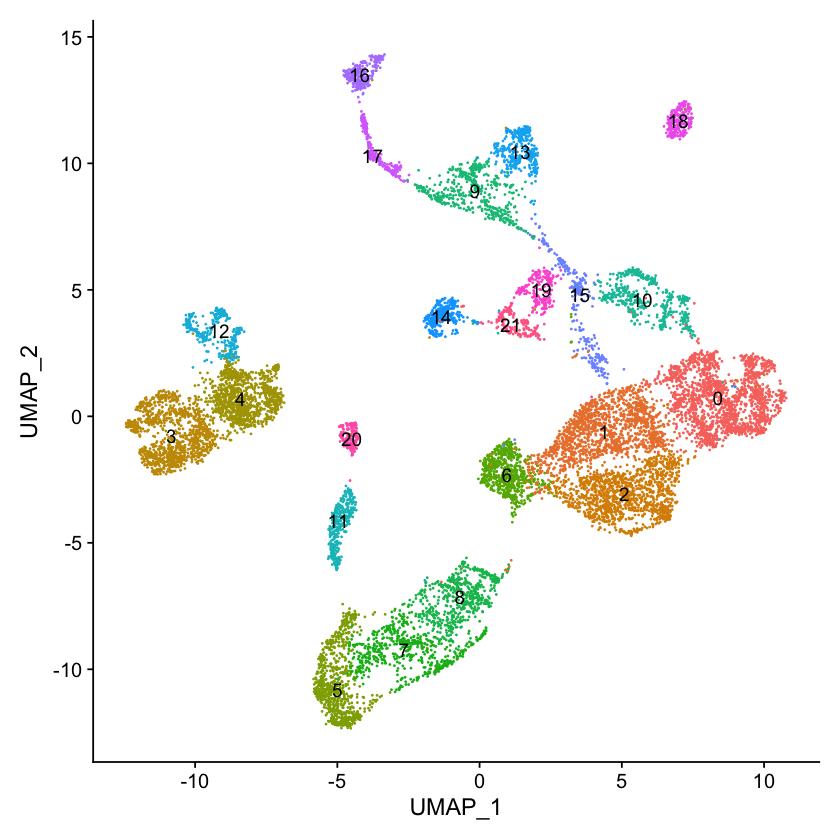

In [5]:
DimPlot(seu_HQC, reduction =  "umap", label = TRUE) + NoLegend()

In [6]:
#loading subclustering results
seu.ecto <- readRDS(file = '../../data/seurat_object/all_integration/subclustering/seu_ecto_subclustering.obj')
seu.meso <- readRDS(file = '../../data/seurat_object/all_integration/subclustering/seu_meso_subclustering.obj')
seu.head <- readRDS(file = '../../data/seurat_object/all_integration/subclustering/seu_head_subclustering.obj')
seu.post <- readRDS(file = '../../data/seurat_object/all_integration/subclustering/seu_post_subclustering.obj')
seu.midline <- readRDS(file = '../../data/seurat_object/all_integration/subclustering/seu_midline_subclustering.obj')
seu.ecto
seu.meso
seu.head
seu.post
seu.midline

An object of class Seurat 
25136 features across 6432 samples within 2 assays 
Active assay: SCT (12568 features, 3000 variable features)
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, harmony, umap, umapwoharmony

An object of class Seurat 
25136 features across 3701 samples within 2 assays 
Active assay: SCT (12568 features, 0 variable features)
 1 other assay present: RNA

An object of class Seurat 
25136 features across 819 samples within 2 assays 
Active assay: SCT (12568 features, 3000 variable features)
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, harmony, umap, umapwoharmony

An object of class Seurat 
25136 features across 1966 samples within 2 assays 
Active assay: SCT (12568 features, 3000 variable features)
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, harmony, umap, umapwoharmony

An object of class Seurat 
25136 features across 301 samples within 2 assays 
Active assay: SCT (12568 features, 3000 variable features)
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, harmony, umap, umapwoharmony

In [7]:
seu.polecell <- subset(seu_HQC,idents=c('18'))
seu.polecell$manual_ID <- 'pole_cells'

## Merge results

In [8]:
seu.merge <- merge(seu.ecto, y = c(seu.meso,seu.head,seu.post,seu.midline,seu.polecell))
seu.merge

An object of class Seurat 
25136 features across 13467 samples within 2 assays 
Active assay: SCT (12568 features, 0 variable features)
 1 other assay present: RNA

In [9]:
seu_HQC$manual_ID <- seu.merge$manual_ID

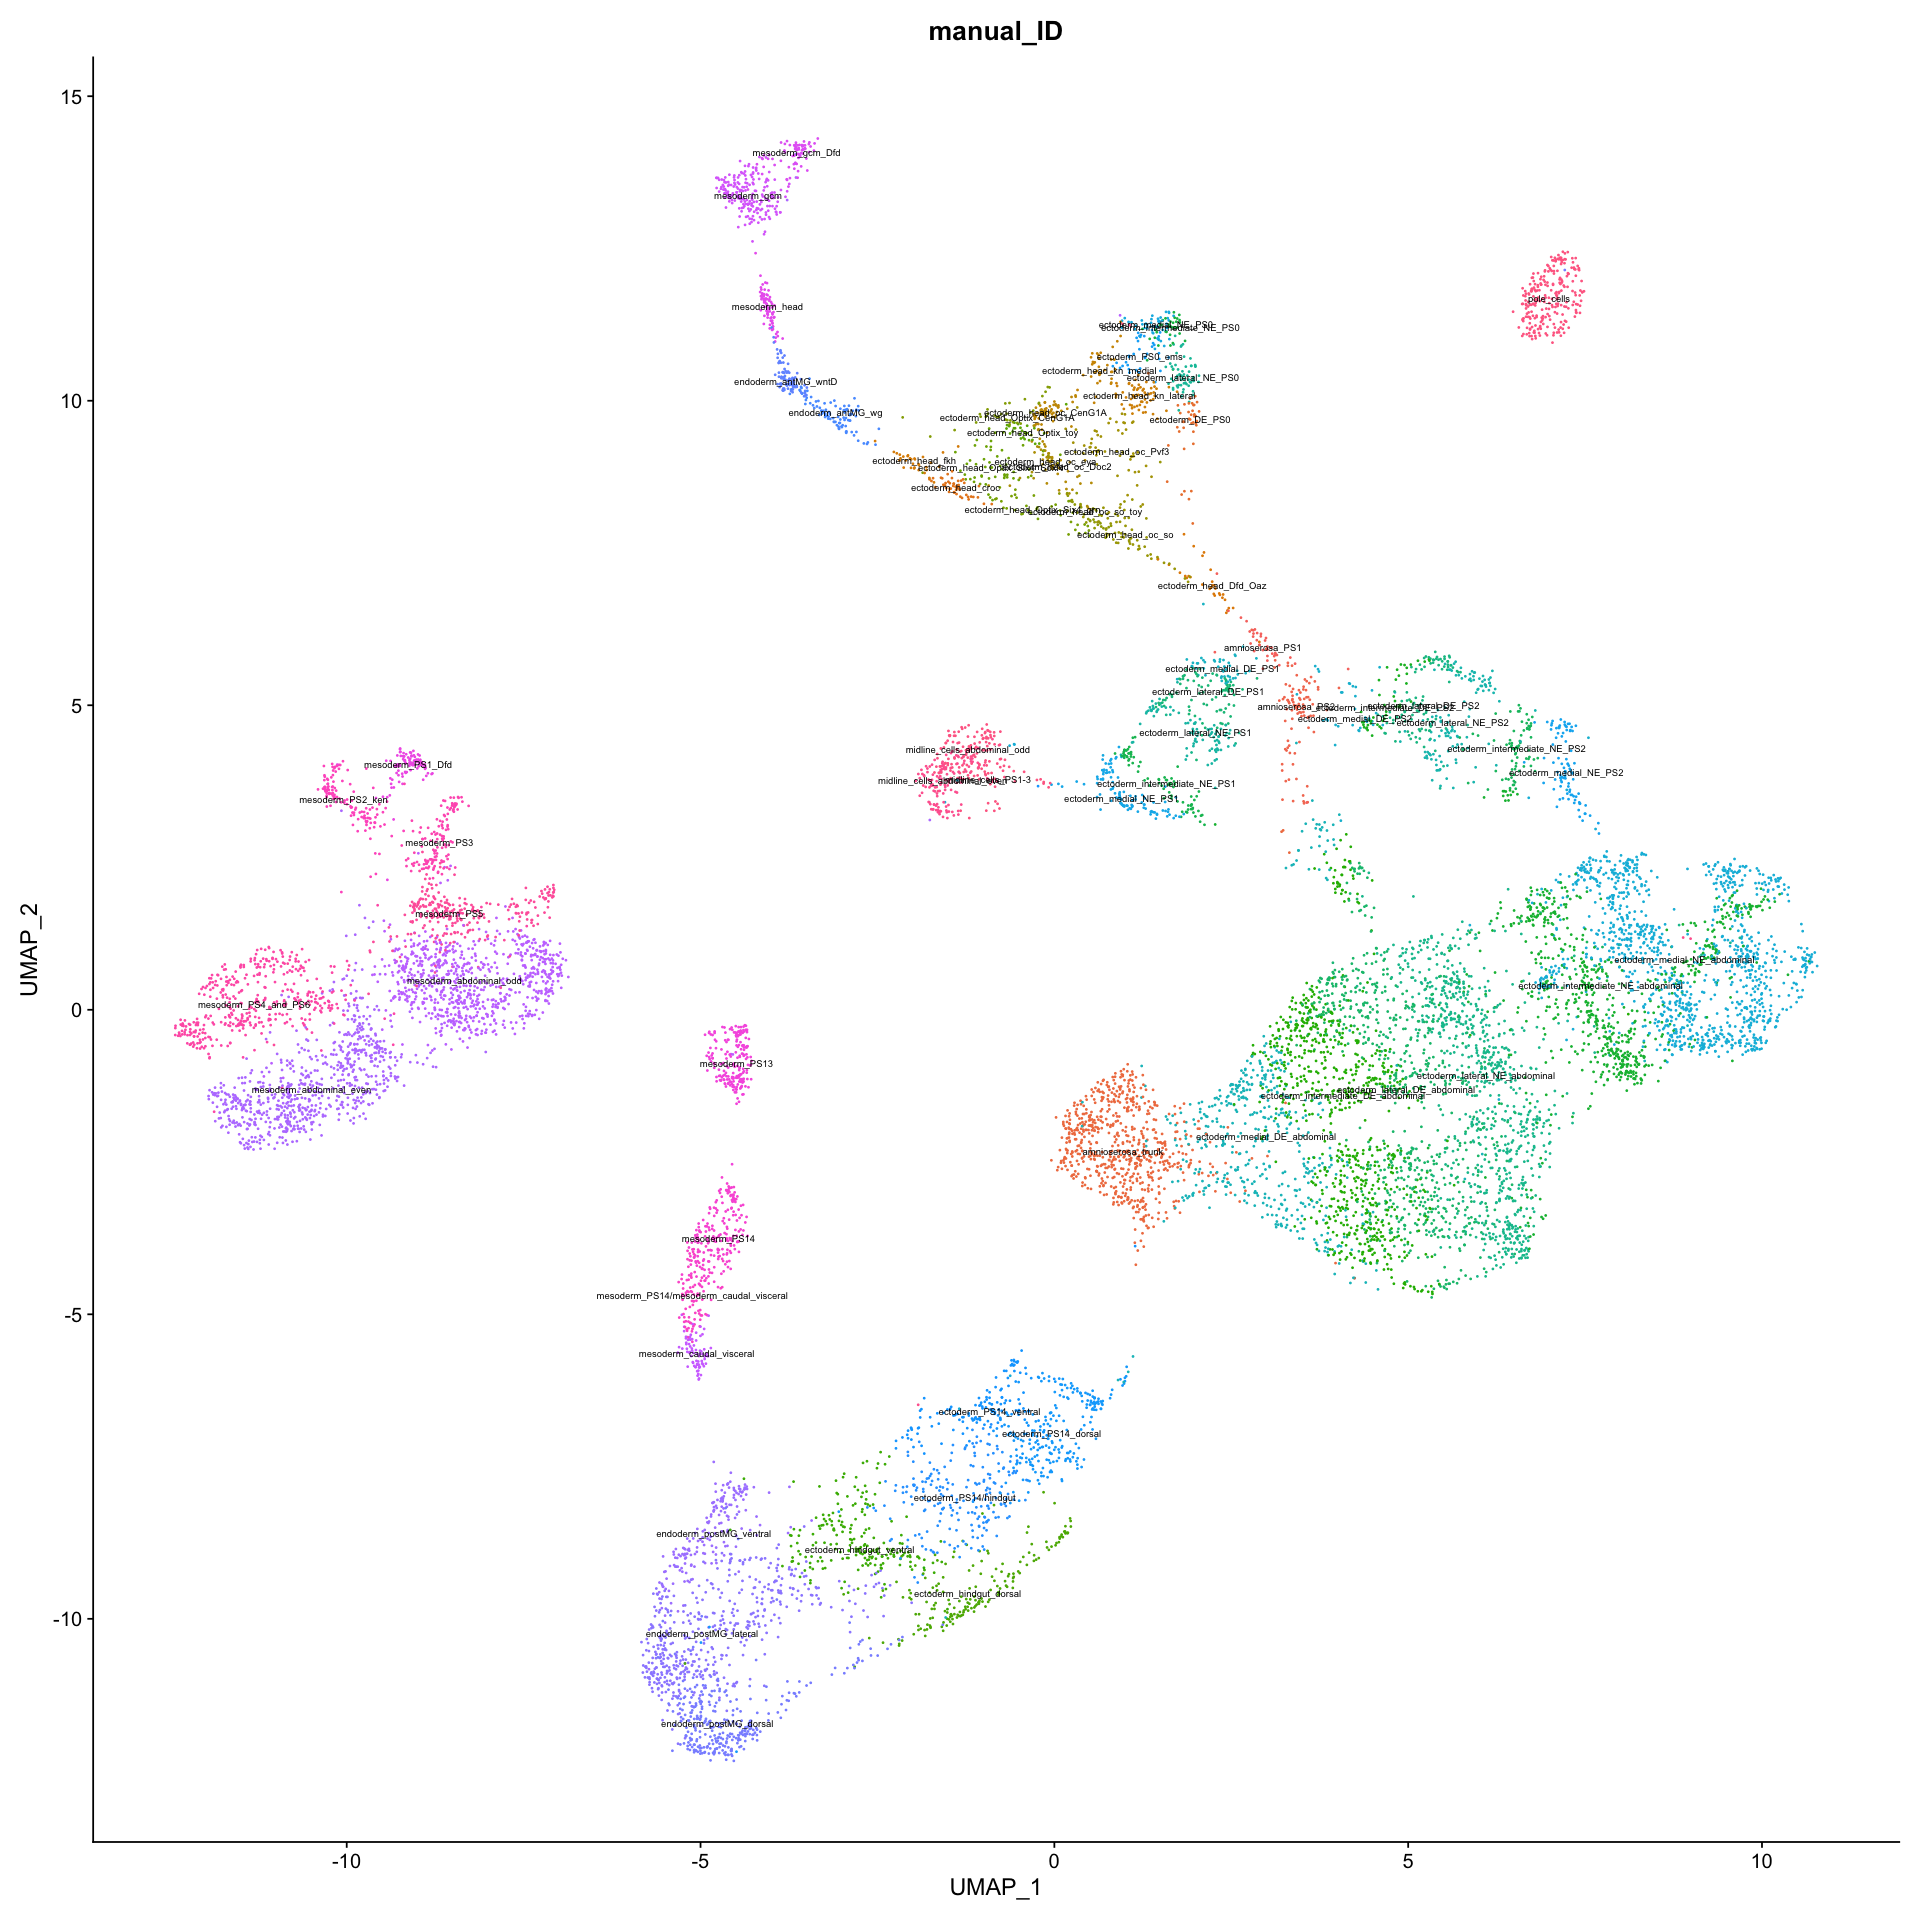

In [10]:
options(repr.plot.width=16, repr.plot.height=16)
DimPlot(seu_HQC, reduction = 'umap', label.size = 2, group.by = 'manual_ID', label = T) + NoLegend()

In [11]:
write.table(as.data.frame(seu_HQC$manual_ID), sep='\t', file='./manual_ID_integration.txt', col.names=FALSE)

In [12]:
levels <- read.table(file="./manual_ID_levels_color_integration.txt", comment.char = '')
colors <- levels[,2]
levels <- levels[,1]
head(levels)
length(levels)
head(colors)
Idents(seu_HQC) <- 'manual_ID'
levels(seu_HQC) <- levels

[1] "ectoderm_head_fkh"             "ectoderm_head_croc"           
[3] "ectoderm_head_Optix_Six4_SoxN" "ectoderm_head_Optix_Six4_grn" 
[5] "ectoderm_head_Optix_toy"       "ectoderm_head_Optix_CenG1A"

[1] 68

[1] "lightsteelblue1" "lightsteelblue1" "lightsteelblue2" "lightsteelblue2"
[5] "lightsteelblue3" "lightsteelblue3"

Saving 7 x 7 in image



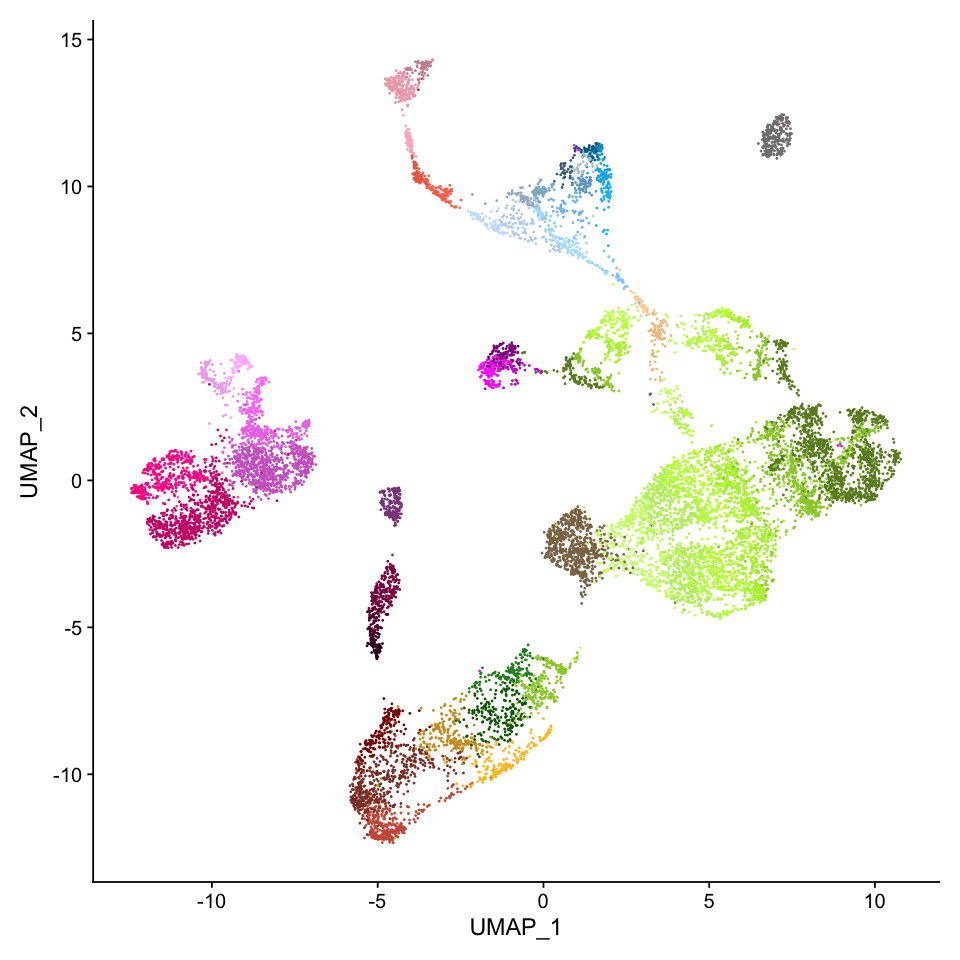

In [13]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu_HQC, reduction =  "umap", label = FALSE, cols = colors) + NoLegend() 
fig
ggsave(fig, file = "./figures/07_merge_ID_integrate_all/all_cells_umap_integration.eps", dpi = 300)

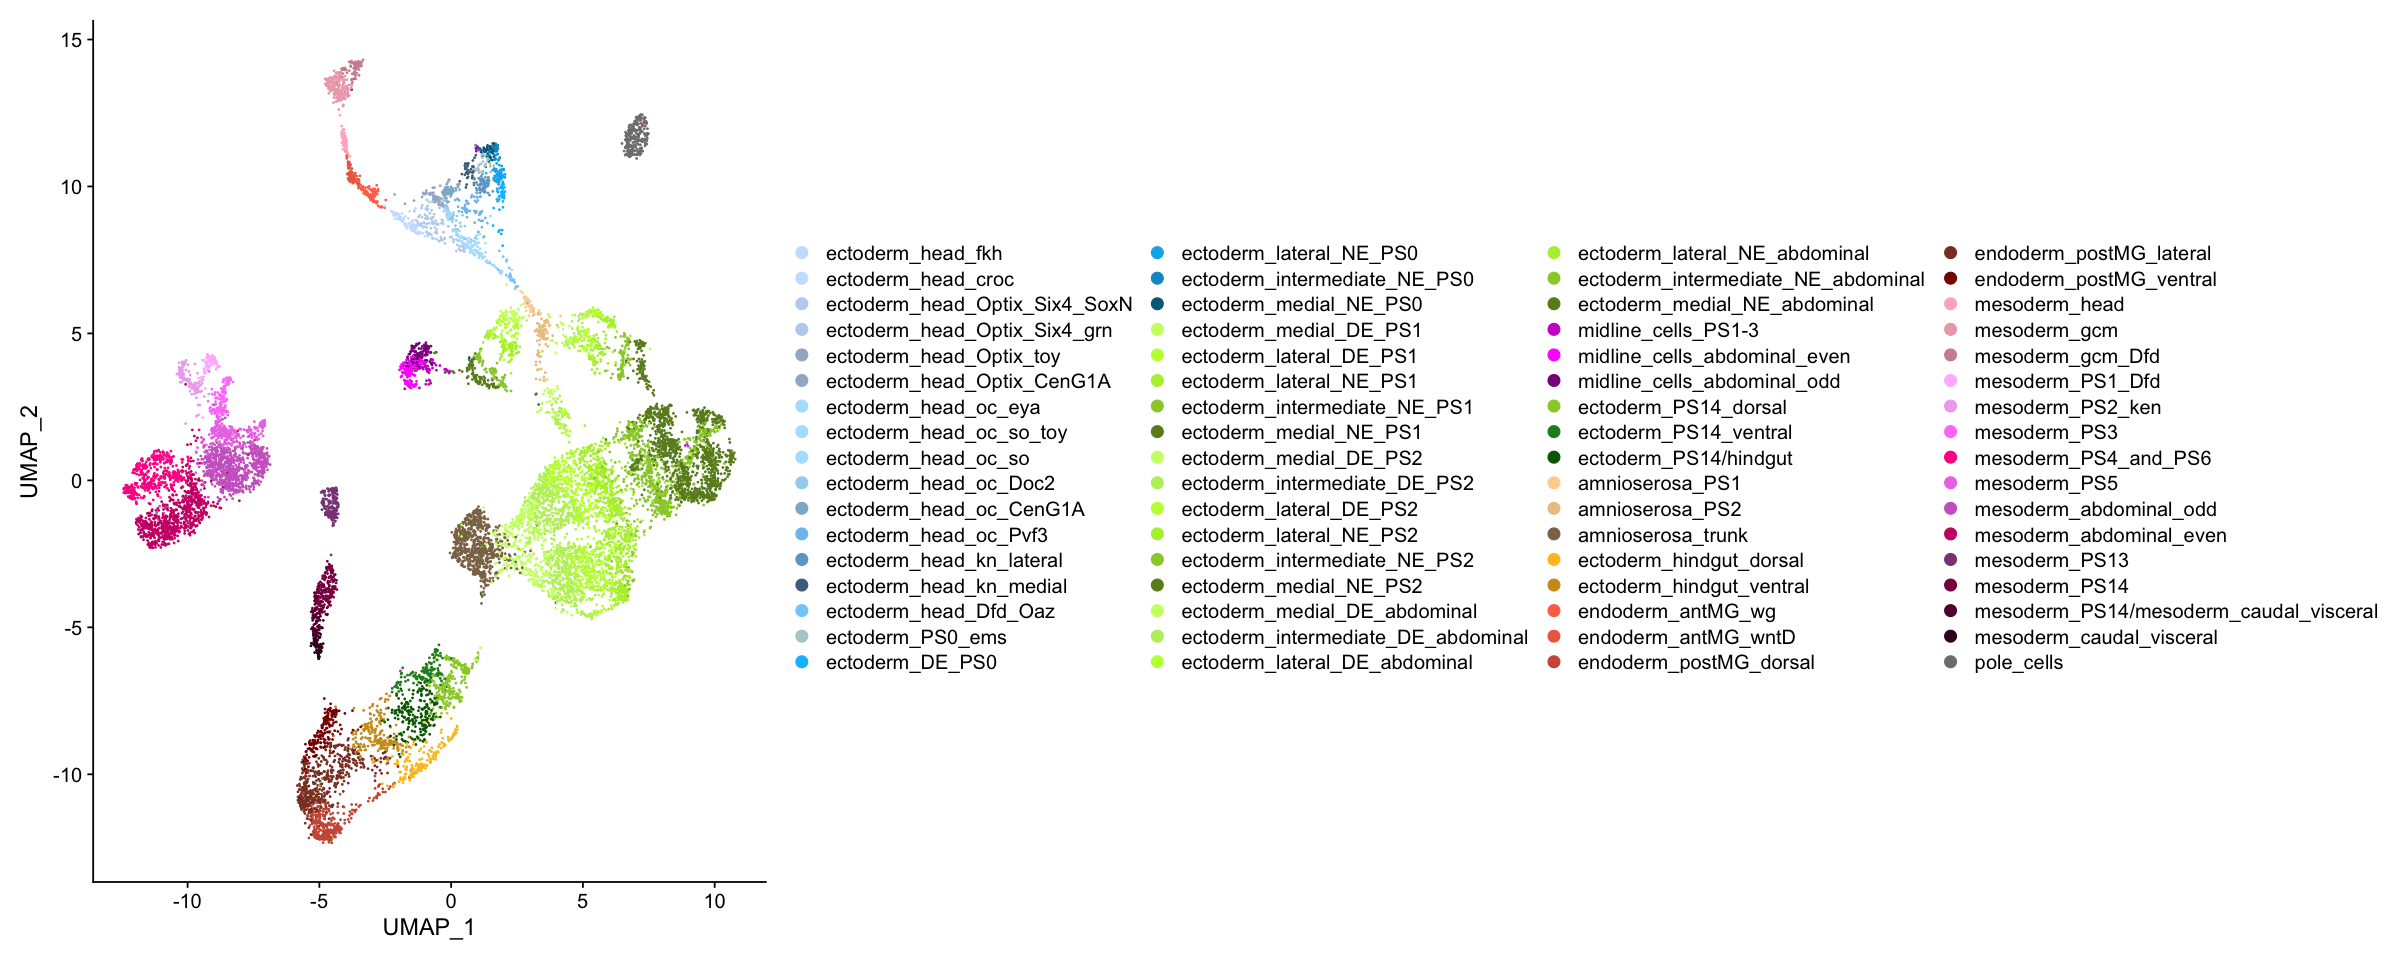

In [14]:
options(repr.plot.width=20, repr.plot.height=8)
fig <- DimPlot(seu_HQC, reduction =  "umap", label = FALSE, cols = colors)
fig
ggsave(fig, file = "./figures/07_merge_ID_integrate_all/all_cells_umap2_integration.eps", dpi = 300, width = 20, height = 8)

## Preparation for making loom file

In [15]:
manual_ID <- seu_HQC$manual_ID
unique.manual_ID <- unique(manual_ID)
manual_ID_num <- copy(manual_ID)
i <- 1
for (name in unique.manual_ID){
    rname <- paste('^',name, sep = '')
    rname <- paste(rname, '$', sep = '')
    manual_ID_num <- gsub(manual_ID_num, pattern = rname, replacement = i)
    i <- i + 1
}
seu_HQC$manual_ID_num <- manual_ID_num

In [16]:
Idents(seu_HQC) <- 'manual_ID'
annot_df <- data.frame(list(
    cluster_id = 1:length(unique.manual_ID), 
    cluster_name = unique.manual_ID))
annot_df

cluster_id,cluster_name
<int>,<chr>
1,endoderm_antMG_wntD
2,mesoderm_head
3,endoderm_antMG_wg
4,ectoderm_intermediate_NE_PS1
5,ectoderm_medial_NE_PS1
6,ectoderm_medial_DE_PS1
7,ectoderm_lateral_DE_PS1
8,ectoderm_lateral_NE_PS1
9,midline_cells_PS1-3


In [17]:
write.csv(annot_df, file = './annot_df.csv')

In [18]:
saveRDS(seu_HQC, file = '../../data/seurat_object/all_integration/seu_HQC_subclustered_integrated.obj')